<a href="https://colab.research.google.com/github/yanliu1111/DGT170_AI_Essentials_course_resources/blob/main/survey_data0416.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries
Import the necessary libraries, including pandas, matplotlib, seaborn, and wordcloud.

In [ ]:
! pip install seaborn

In [1]:
# Import Required Libraries

import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For making statistical graphics
from wordcloud import WordCloud  # For generating word clouds

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Load Dataset
Load the dataset from the CSV file located at /content/surveydata0219.csv using pandas.

In [2]:
# Load Dataset

# Load the dataset from the CSV file
df = pd.read_csv('Book0322.csv')
df.head()

# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()

,Start time,city,Session,Enter your age,Gender,Are you currently affiliated with the University of Calgary?,How would you rate your experience with Artificial Intelligence (AI),Do you have any experience with programming languages or tools used in AI?,What are your goals for completing this course?
0,1/31/2025 12:52,Carstairs,1,42,Female,Staff,Beginner,No,Interest in AI and technology;Career advancement;
1,1/31/2025 13:08,Calgary,1,53,Female,Alumni,Beginner,No,Career advancement;Personal growth and learnin...
2,1/31/2025 13:11,Barrie Ontario,1,43,Male,Continuing Education student,Intermediate,Yes,Interest in AI and technology;Free course avai...
3,1/31/2025 13:11,Calgary,1,36,Male,Alumni,Beginner,Yes,Career advancement;Personal growth and learnin...
4,1/31/2025 13:11,Calgary,1,29,Female,Alumni,Beginner,No,Free course availability;Interest in AI and te...


# Visualization: Number of People in Each Session
Create a bar chart to show the number of people in each session.

<ipython-input-7-e590d971d395>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=session_counts.index, y=session_counts.values, palette='viridis')


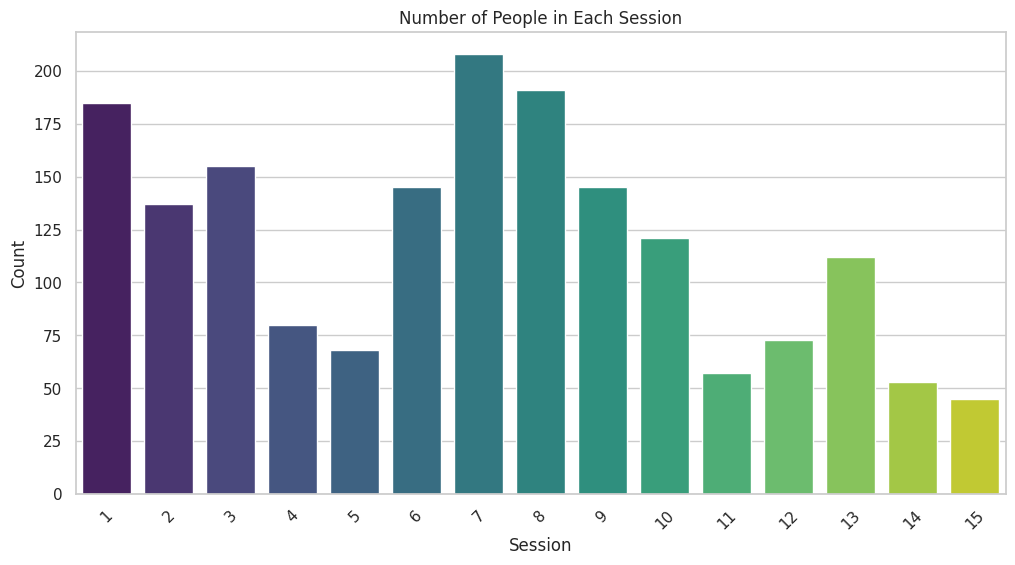

In [7]:
# Visualization: Number of People in Each Session

# Count the number of people in each session
session_counts = df['Session'].value_counts()

# Create a bar chart to show the number of people in each session
plt.figure(figsize=(12, 6))
sns.barplot(x=session_counts.index, y=session_counts.values, palette='viridis')
plt.title('Number of People in Each Session')
plt.xlabel('Session')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization: Programmer with AI within Each Session
Create a grouped bar chart or stacked bar chart to compare the total count of 'programmer with AI' within each session.

<Figure size 1400x700 with 0 Axes>

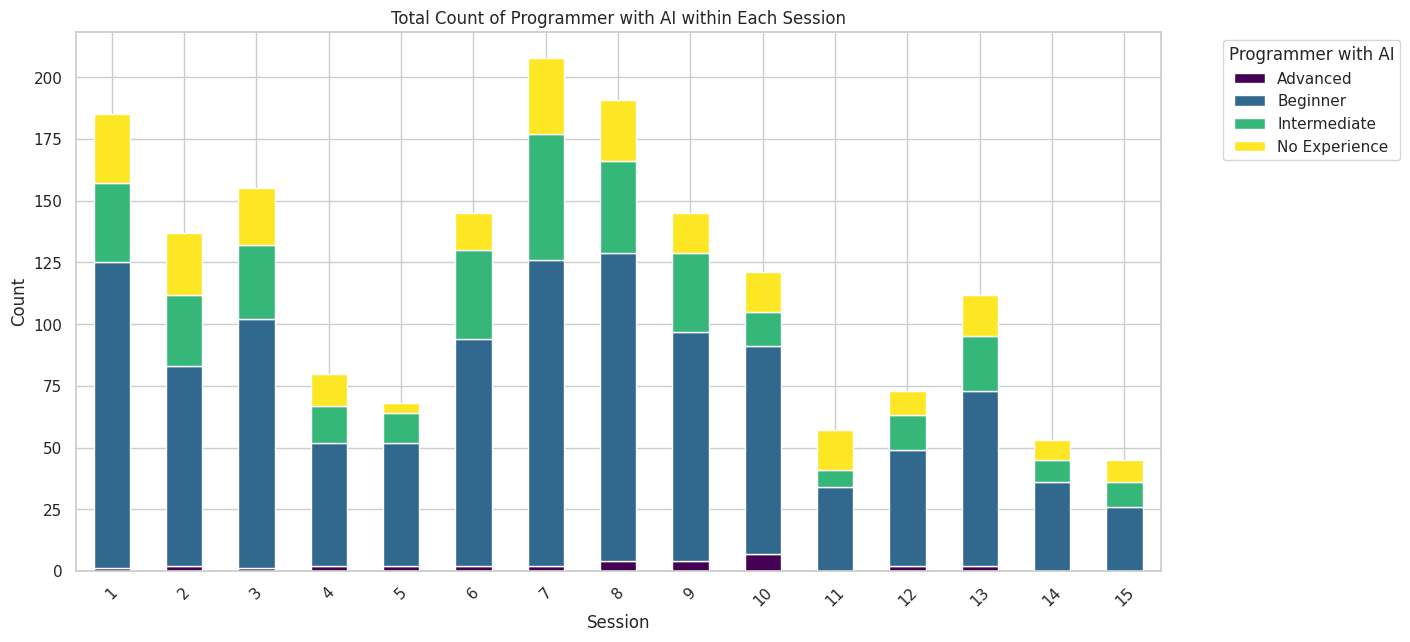

In [5]:
# Visualization: Programmer with AI within Each Session

# Create a grouped bar chart to compare the total count of 'programmer with AI' within each Session
plt.figure(figsize=(14, 7))

# Create a crosstab to get the counts of 'programmer with AI' within each Session
programmer_session_counts = pd.crosstab(df['Session'], df['How would you rate your experience with Artificial Intelligence (AI)'])

# Plot the grouped bar chart
programmer_session_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))

# Add title and labels
plt.title('Total Count of Programmer with AI within Each Session')
plt.xlabel('Session')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Programmer with AI', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Gender and AI Experience Analysis


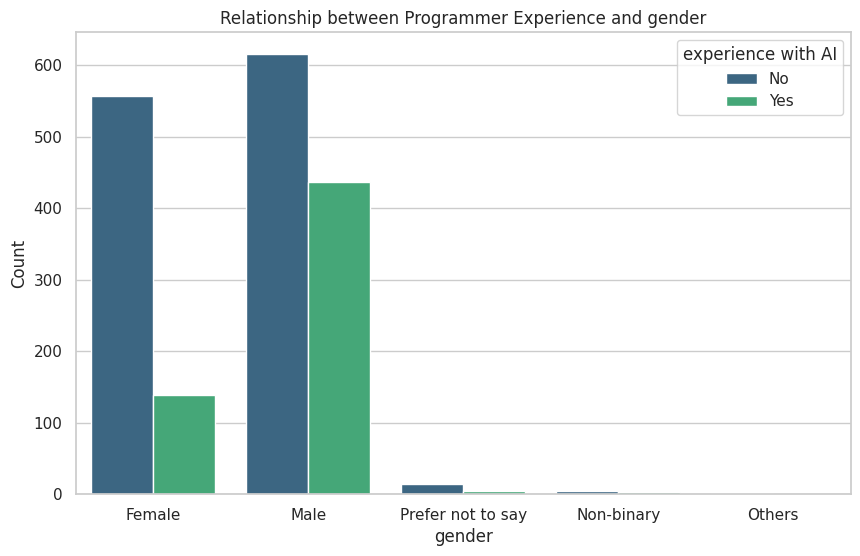

In [8]:
df = df.rename(columns={'Do you have any experience with programming languages or tools used in AI?': 'experience with AI'})

gender_ai_experience_data = pd.crosstab(df['Gender'], df['experience with AI'])

# Display the crosstab
gender_ai_experience_data

# Create a bar chart to visualize the relationship between 'programmer experience or not' and 'experience with AI'
plt.figure(figsize=(10, 6))
sns.barplot
sns.countplot(x='Gender', hue='experience with AI', data=df, palette='viridis')
plt.title('Relationship between Programmer Experience and gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

# programmer experience or not and AI Experience Analysis
Replace 'Gender' with 'programmer experience or not' and analyze its relationship with 'experience with AI'. Create a visualization (e.g., a heatmap or bar chart) to show how AI experience is distributed among different AI programming groups.

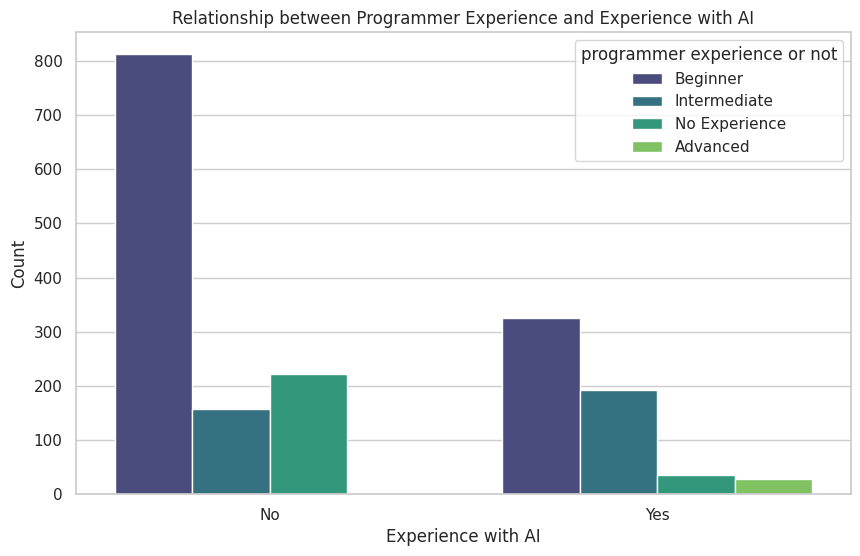

In [9]:
# Gender and AI Experience Analysis

# Replace 'Gender' with 'programmer experience or not' and analyze its relationship with 'experience with AI'
# Create a crosstab to see the distribution
# df = df.rename(columns={'Do you have any experience with programming languages or tools used in AI?': 'experience with AI'})
df = df.rename(columns={'How would you rate your experience with Artificial Intelligence (AI)': 'programmer experience or not'})

gender_ai_experience_data = pd.crosstab(df['experience with AI'], df['programmer experience or not'])

# Display the crosstab
gender_ai_experience_data

# Create a bar chart to visualize the relationship between 'programmer experience or not' and 'experience with AI'
plt.figure(figsize=(10, 6))
sns.barplot
sns.countplot(x='experience with AI', hue='programmer experience or not', data=df, palette='viridis')
plt.title('Relationship between Programmer Experience and Experience with AI')
plt.xlabel('Experience with AI')
plt.ylabel('Count')
plt.show()

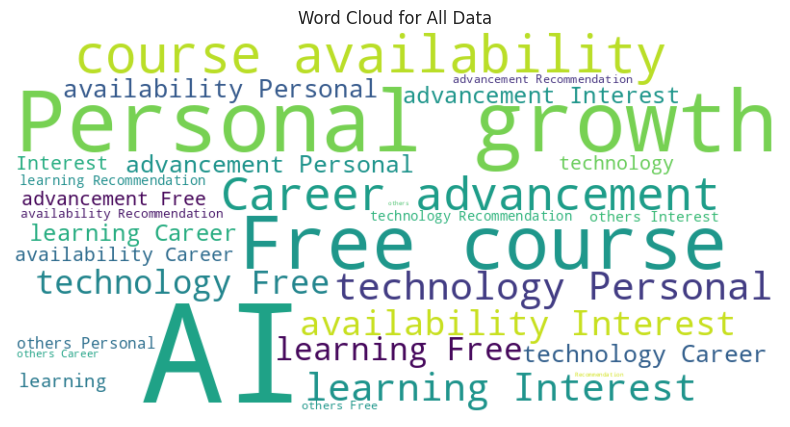

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text):
    return WordCloud(width=800, height=400, background_color='white').generate(text)

# Generate word cloud for all data
all_data_text = ' '.join(df['What are your goals for completing this course?'].dropna())  # Assuming 'city' is the relevant column
wordcloud = generate_wordcloud(all_data_text)

# Display the word cloud
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Data')
plt.axis('off')
plt.show()

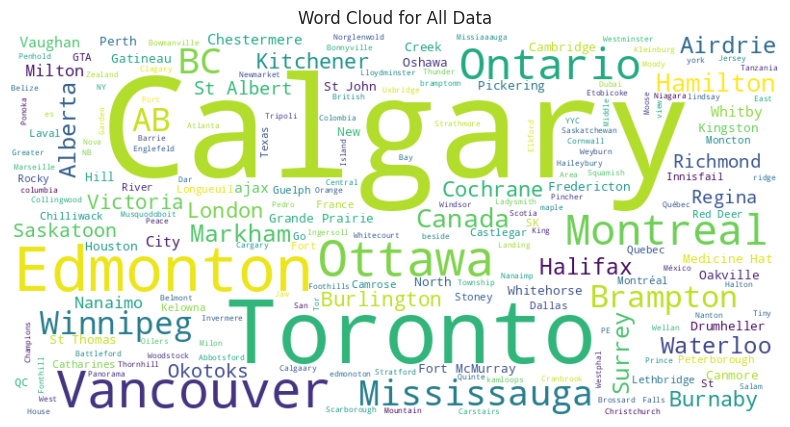

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text):
    return WordCloud(width=800, height=400, background_color='white').generate(text)

# Generate word cloud for all data
all_data_text = ' '.join(df['city'].dropna())  # Assuming 'city' is the relevant column
wordcloud = generate_wordcloud(all_data_text)

# Display the word cloud
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Data')
plt.axis('off')
plt.show()